## House Price Prediction

### Load libraries

In [1]:
# Install XGBoost if necessary
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 75.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 77.5 MB/s eta 0:00:0000:0100:01


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import mutual_info_score
from sklearn.metrics import root_mean_squared_error

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# from IPython.display import display

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.expand_frame_repr', False)

### Configuration

In [3]:
SEED = 42

### Load dataset

In [4]:
df = pd.read_csv('data/train.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0


### Data preparation and data cleaning

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
del df['id']

In [11]:
df.isna().sum().sort_values(ascending=False).head(15)

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
masvnrtype       872
fireplacequ      690
lotfrontage      259
garagequal        81
garagetype        81
garagefinish      81
garagecond        81
garageyrblt       81
bsmtexposure      38
bsmtfintype2      38
bsmtqual          37
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Calculate a percentage of null values in columns
df.isnull().mean().round(3).sort_values(ascending=False).head(10)

poolqc          0.995
miscfeature     0.963
alley           0.938
fence           0.808
masvnrtype      0.597
fireplacequ     0.473
lotfrontage     0.177
garagequal      0.055
garagetype      0.055
garagefinish    0.055
dtype: float64

In [14]:
# Drop columns with a percentage of null greater than 15%
drop_list = df.columns[df.isnull().sum() / df.shape[0] > .15].to_list()

df = df.drop(columns=drop_list)

In [15]:
df.shape

(1460, 73)

In [16]:
numerical = df.columns[df.dtypes != 'object'].tolist()
numerical

['mssubclass',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 '3ssnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice']

In [17]:
df[numerical].isna().sum().sort_values(ascending=False)

garageyrblt      81
masvnrarea        8
mssubclass        0
lotarea           0
overallcond       0
overallqual       0
yearremodadd      0
yearbuilt         0
bsmtfinsf2        0
bsmtunfsf         0
totalbsmtsf       0
bsmtfinsf1        0
2ndflrsf          0
lowqualfinsf      0
grlivarea         0
bsmtfullbath      0
bsmthalfbath      0
fullbath          0
halfbath          0
1stflrsf          0
bedroomabvgr      0
kitchenabvgr      0
totrmsabvgrd      0
fireplaces        0
garagecars        0
garagearea        0
wooddecksf        0
openporchsf       0
enclosedporch     0
3ssnporch         0
screenporch       0
poolarea          0
miscval           0
mosold            0
yrsold            0
saleprice         0
dtype: int64

In [18]:
# Fill NA for numerical columns
df['garageyrblt'] = df['garageyrblt'].fillna(value=df['garageyrblt'].median())
df['masvnrarea'] = df['masvnrarea'].fillna(value=df['masvnrarea'].median())

In [19]:
df[numerical].head().T

,0,1,2,3,4
mssubclass,60.0,20.0,60.0,70.0,60.0
lotarea,8450.0,9600.0,11250.0,9550.0,14260.0
overallqual,7.0,6.0,7.0,7.0,8.0
overallcond,5.0,8.0,5.0,5.0,5.0
yearbuilt,2003.0,1976.0,2001.0,1915.0,2000.0
yearremodadd,2003.0,1976.0,2002.0,1970.0,2000.0
masvnrarea,196.0,0.0,162.0,0.0,350.0
bsmtfinsf1,706.0,978.0,486.0,216.0,655.0
bsmtfinsf2,0.0,0.0,0.0,0.0,0.0
bsmtunfsf,150.0,284.0,434.0,540.0,490.0


In [20]:
# Some of numerical values can be moved to categorical
for c in ['yrsold','mosold','garageyrblt','yearremodadd','yearbuilt','overallqual','overallcond']:
    df[c] = df[c].astype(str)
    numerical.remove(c)

In [21]:
categorical = df.columns[df.dtypes == 'object'].to_list()

In [22]:
df[categorical].isna().sum().sort_values(ascending=False)

garagetype       81
garagecond       81
garagequal       81
garagefinish     81
bsmtfintype2     38
bsmtexposure     38
bsmtqual         37
bsmtcond         37
bsmtfintype1     37
electrical        1
mszoning          0
street            0
housestyle        0
bldgtype          0
condition2        0
condition1        0
neighborhood      0
landslope         0
lotconfig         0
utilities         0
landcontour       0
lotshape          0
roofmatl          0
exterior1st       0
exterior2nd       0
overallqual       0
yearbuilt         0
overallcond       0
extercond         0
exterqual         0
foundation        0
yearremodadd      0
roofstyle         0
centralair        0
heatingqc         0
heating           0
garageyrblt       0
functional        0
kitchenqual       0
paveddrive        0
mosold            0
yrsold            0
saletype          0
salecondition     0
dtype: int64

In [23]:
# Drop rows with null values
df.dropna(inplace=True)

In [24]:
df.shape

(1346, 73)

In [25]:
# Add some new features
df['age'] = 2025 - df['yearbuilt'].astype(int)
df['totalsf'] = df['totalbsmtsf'] + df['1stflrsf'] + df['2ndflrsf']

In [26]:
numerical.append('age')
numerical.append('totalsf')

In [27]:
numerical.remove('saleprice')

### Exploratory data analysis and feature importance analysis

Text(0.5, 1.0, 'SalePrice Distribution')

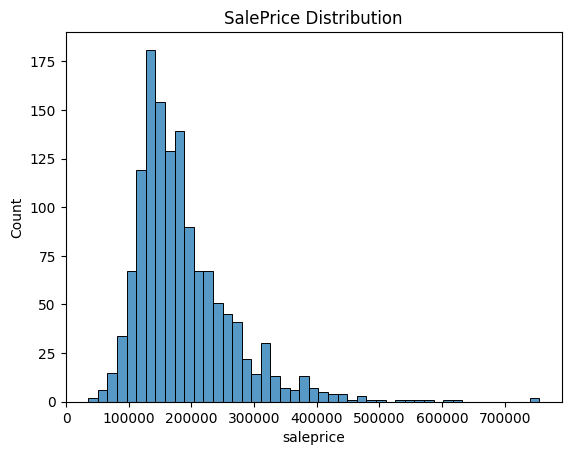

In [28]:
sns.histplot(df['saleprice'])
plt.title('SalePrice Distribution')

Text(0.5, 1.0, 'SalePrice Distribution')

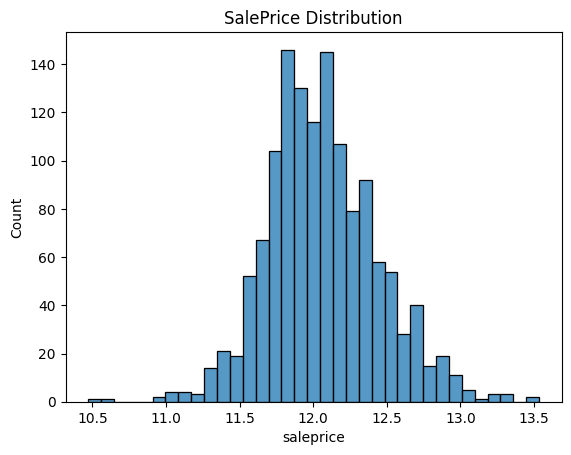

In [29]:
seleprice_logs = np.log1p(df['saleprice'])

sns.histplot(seleprice_logs)
plt.title('SalePrice Distribution')

<Axes: title={'center': 'Avg Sale Price per Calendar Year'}, xlabel='yrsold'>

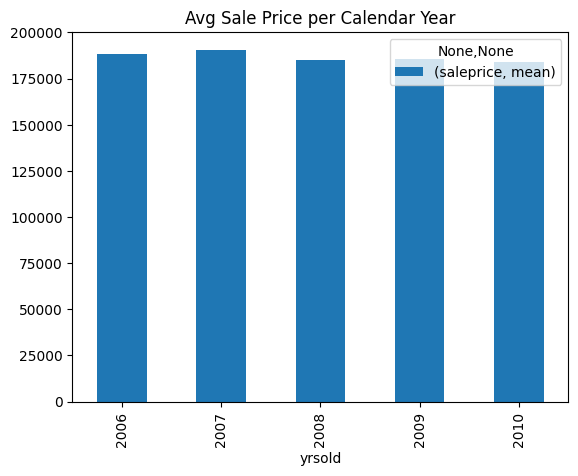

In [30]:
df.groupby('yrsold').agg({'saleprice': ['mean']}).plot.bar(title='Avg Sale Price per Calendar Year')

<Axes: title={'center': 'Avg Sale Price per Calendar Month'}, xlabel='mosold'>

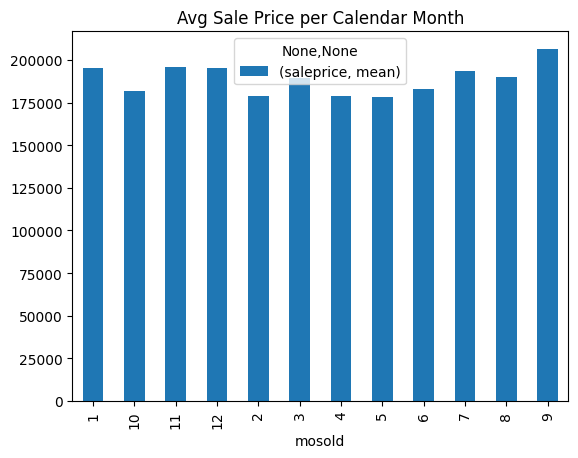

In [31]:
df.groupby('mosold').agg({'saleprice': ['mean']}).plot.bar(title='Avg Sale Price per Calendar Month')

In [32]:
# Correlation of numeric columns
df[numerical].corrwith(df["saleprice"]).sort_values(ascending=False)

totalsf          0.774239
grlivarea        0.710017
garagecars       0.641109
garagearea       0.608736
1stflrsf         0.603505
totalbsmtsf      0.602612
fullbath         0.567029
totrmsabvgrd     0.548900
masvnrarea       0.460847
fireplaces       0.443355
bsmtfinsf1       0.362246
openporchsf      0.327406
2ndflrsf         0.307796
wooddecksf       0.305896
halfbath         0.260352
lotarea          0.253854
bsmtfullbath     0.211808
bsmtunfsf        0.190390
bedroomabvgr     0.165177
screenporch      0.095076
poolarea         0.091166
3ssnporch        0.041510
lowqualfinsf    -0.010330
miscval         -0.017222
bsmthalfbath    -0.030957
bsmtfinsf2      -0.032170
mssubclass      -0.081120
kitchenabvgr    -0.109509
enclosedporch   -0.127199
age             -0.504132
dtype: float64

In [33]:
abs(df[numerical].corrwith(df["saleprice"])).sort_values(ascending=False)

totalsf          0.774239
grlivarea        0.710017
garagecars       0.641109
garagearea       0.608736
1stflrsf         0.603505
totalbsmtsf      0.602612
fullbath         0.567029
totrmsabvgrd     0.548900
age              0.504132
masvnrarea       0.460847
fireplaces       0.443355
bsmtfinsf1       0.362246
openporchsf      0.327406
2ndflrsf         0.307796
wooddecksf       0.305896
halfbath         0.260352
lotarea          0.253854
bsmtfullbath     0.211808
bsmtunfsf        0.190390
bedroomabvgr     0.165177
enclosedporch    0.127199
kitchenabvgr     0.109509
screenporch      0.095076
poolarea         0.091166
mssubclass       0.081120
3ssnporch        0.041510
bsmtfinsf2       0.032170
bsmthalfbath     0.030957
miscval          0.017222
lowqualfinsf     0.010330
dtype: float64

In [34]:
# Keep columns with correlation over 15%
numerical_corr = numerical

for c in ['enclosedporch','kitchenabvgr','screenporch','poolarea','mssubclass','3ssnporch','bsmtfinsf2','bsmthalfbath','miscval','lowqualfinsf']:
    numerical_corr.remove(c)

In [35]:
numerical_corr

['lotarea',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'grlivarea',
 'bsmtfullbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'age',
 'totalsf']

In [36]:
# Avarege Sales price and Risk ratio
avg_saleprice = df['saleprice'].mean()

for c in categorical:
    print(c)
    df_group = df.groupby(c)['saleprice'].agg(["mean","count"])
    df_group["diff"] = df_group["mean"] - avg_saleprice
    df_group["risk"] = df_group["mean"] / avg_saleprice
    display(df_group.sort_values(by='count',ascending=False))
    print()

mszoning


,mean,count,diff,risk
mszoning,,,,
RL,196780.244631,1071,9722.934824,1.051978
RM,131409.785340,191,-55647.524467,0.702511
FV,214014.061538,65,26956.751732,1.144110
RH,126539.454545,11,-60517.855261,0.676474
C (all),78172.500000,8,-108884.809807,0.417907



street


,mean,count,diff,risk
street,,,,
Pave,187260.623415,1341,203.313609,1.001087
Grvl,132528.600000,5,-54528.709807,0.708492



lotshape


,mean,count,diff,risk
lotshape,,,,
Reg,170968.682635,835,-16088.627172,0.913991
IR1,210836.780911,461,23779.471104,1.127124
IR2,241604.200000,40,54546.890193,1.291605
IR3,216036.500000,10,28979.190193,1.154921



landcontour


,mean,count,diff,risk
landcontour,,,,
Lvl,185892.839374,1214,-1164.470433,0.993775
Bnk,148604.519231,52,-38452.790576,0.794433
HLS,236879.104167,48,49821.794360,1.266345
Low,218987.500000,32,31930.190193,1.170697



utilities


,mean,count,diff,risk
utilities,,,,
AllPub,187094.15539,1345,36.845583,1.000197
NoSeWa,137500.00000,1,-49557.309807,0.735069



lotconfig


,mean,count,diff,risk
lotconfig,,,,
Inside,183258.275182,963,-3799.034625,0.979691
Corner,187131.269388,245,73.959581,1.000395
CulDSac,227376.197802,91,40318.887995,1.215543
FR2,184398.255814,43,-2659.053993,0.985785
FR3,208475.000000,4,21417.690193,1.114498



landslope


,mean,count,diff,risk
landslope,,,,
Gtl,185931.099764,1273,-1126.210042,0.993979
Mod,204801.950820,61,17744.641013,1.094862
Sev,216327.500000,12,29270.190193,1.156477



neighborhood


,mean,count,diff,risk
neighborhood,,,,
NAmes,148680.588517,209,-38376.721290,0.794840
CollgCr,199012.013605,147,11954.703799,1.063909
OldTown,132517.090000,100,-54540.219807,0.708430
Somerst,225379.837209,86,38322.527402,1.204871
Gilbert,193160.333333,78,6103.023526,1.032626
NridgHt,316695.236842,76,129637.927035,1.693039
NWAmes,189050.068493,73,1992.758686,1.010653
Edwards,137088.142857,70,-49969.166950,0.732867
Sawyer,139278.144928,69,-47779.164879,0.744575



condition1


,mean,count,diff,risk
condition1,,,,
Norm,190412.904274,1170,3355.594467,1.017939
Feedr,150990.936508,63,-36066.373299,0.807191
Artery,138137.209302,43,-48920.100505,0.738475
RRAn,184396.615385,26,-2660.694422,0.985776
PosN,215184.210526,19,28126.900719,1.150365
RRAe,141040.000000,10,-46017.309807,0.753994
PosA,225875.000000,8,38817.690193,1.207518
RRNn,212400.000000,5,25342.690193,1.135481
RRNe,190750.000000,2,3692.690193,1.019741



condition2


,mean,count,diff,risk
condition2,,,,
Norm,187319.057057,1332,261.747250,1.001399
Feedr,128400.000000,5,-58657.309807,0.686421
Artery,106500.000000,2,-80557.309807,0.569344
PosN,284875.000000,2,97817.690193,1.522929
RRNn,96750.000000,2,-90307.309807,0.517221
PosA,325000.000000,1,137942.690193,1.737435
RRAe,190000.000000,1,2942.690193,1.015731
RRAn,136905.000000,1,-50152.309807,0.731888



bldgtype


,mean,count,diff,risk
bldgtype,,,,
1Fam,191064.683843,1145,4007.374036,1.021423
TwnhsE,182901.460177,113,-4155.849630,0.977783
Twnhs,142057.894737,38,-44999.415070,0.759435
Duplex,144723.607143,28,-42333.702664,0.773686
2fmCon,131443.181818,22,-55614.127989,0.702689



housestyle


,mean,count,diff,risk
housestyle,,,,
1Story,183089.252266,662,-3968.057541,0.978787
2Story,213166.508159,429,26109.198352,1.139579
1.5Fin,148774.970149,134,-38282.339658,0.795344
SLvl,166690.937500,64,-20366.372307,0.891122
SFoyer,140675.200000,30,-46382.109807,0.752043
1.5Unf,112945.454545,11,-74111.855261,0.603801
2.5Unf,160290.000000,10,-26767.309807,0.856903
2.5Fin,242666.666667,6,55609.356860,1.297285



overallqual


,mean,count,diff,risk
overallqual,,,,
6,163321.703601,361,-23735.606206,0.873111
5,135481.464387,351,-51575.845419,0.724278
7,208004.870253,316,20947.560446,1.111985
8,275599.819277,166,88542.509470,1.473344
4,113702.024691,81,-73355.285115,0.607846
9,367513.023256,43,180455.713449,1.964708
10,438588.388889,18,251531.079082,2.344674
3,98009.375000,8,-89047.934807,0.523954
2,47655.500000,2,-139401.809807,0.254764



overallcond


,mean,count,diff,risk
overallcond,,,,
5,207970.092784,776,20912.782977,1.111799
6,157665.901709,234,-29391.408097,0.842875
7,164485.655738,183,-22571.654069,0.879333
8,158360.661765,68,-28696.648042,0.846589
4,125046.934783,46,-62010.375024,0.668495
9,226180.000000,20,39122.690193,1.209148
3,112933.437500,16,-74123.872307,0.603737
2,182810.666667,3,-4246.643140,0.977298



yearbuilt


,mean,count,diff,risk
yearbuilt,,,,
2006,255645.461538,65,68588.151732,1.366669
2005,229680.953125,64,42623.643318,1.227864
2004,211656.169811,53,24598.860004,1.131504
2007,257620.291667,48,70562.981860,1.377227
2003,226764.790698,43,39707.480891,1.212274
...,...,...,...,...
1893,325000.000000,1,137942.690193,1.737435
1904,157500.000000,1,-29557.309807,0.841988
1898,106000.000000,1,-81057.309807,0.566671



yearremodadd


,mean,count,diff,risk
yearremodadd,,,,
1950,124433.268966,145,-62624.040841,0.665215
2006,237893.406593,91,50836.096787,1.271767
2007,228265.082192,73,41207.772385,1.220295
2005,212868.084507,71,25810.774700,1.137983
2004,195285.666667,60,8228.356860,1.043988
...,...,...,...,...
1983,136880.000000,5,-50177.309807,0.731754
1986,189400.000000,5,2342.690193,1.012524
1982,135880.000000,5,-51177.309807,0.726408



roofstyle


,mean,count,diff,risk
roofstyle,,,,
Gable,177355.159962,1044,-9702.149845,0.948133
Hip,224054.589744,273,36997.279937,1.197786
Flat,211042.727273,11,23985.417466,1.128225
Gambrel,155700.000000,10,-31357.309807,0.832365
Mansard,187496.500000,6,439.190193,1.002348
Shed,225000.000000,2,37942.690193,1.202840



roofmatl


,mean,count,diff,risk
roofmatl,,,,
CompShg,185841.27761,1322,-1216.032197,0.993499
Tar&Grv,203330.00000,9,16272.690193,1.086993
WdShngl,390250.00000,6,203192.690193,2.086259
WdShake,241400.00000,5,54342.690193,1.290514
Metal,180000.00000,1,-7057.309807,0.962272
Membran,241500.00000,1,54442.690193,1.291048
ClyTile,160000.00000,1,-27057.309807,0.855353
Roll,137000.00000,1,-50057.309807,0.732396



exterior1st


,mean,count,diff,risk
exterior1st,,,,
VinylSd,218316.179226,491,31258.869419,1.167109
HdBoard,165314.834123,211,-21742.475684,0.883766
MetalSd,152900.144279,201,-34157.165528,0.817397
Wd Sdng,156731.407609,184,-30325.902198,0.837879
Plywood,179080.160000,100,-7977.149807,0.957355
CemntBd,249937.592593,54,62880.282786,1.336155
BrkFace,205869.318182,44,18812.008375,1.100568
Stucco,177559.523810,21,-9497.785997,0.949225
WdShing,163105.000000,20,-23952.309807,0.871952



exterior2nd


,mean,count,diff,risk
exterior2nd,,,,
VinylSd,219101.583333,480,32044.273526,1.171307
HdBoard,170031.370558,197,-17025.939248,0.908980
MetalSd,153004.715736,197,-34052.594071,0.817956
Wd Sdng,154907.698864,176,-32149.610943,0.828130
Plywood,173616.267717,127,-13441.042090,0.928145
CmentBd,248474.150943,53,61416.841137,1.328332
Wd Shng,171953.125000,32,-15104.184807,0.919254
Stucco,165262.347826,23,-21794.961981,0.883485
BrkFace,207479.545455,22,20422.235648,1.109176



exterqual


,mean,count,diff,risk
exterqual,,,,
TA,149087.450809,803,-37969.858997,0.797015
Gd,232045.770661,484,44988.460854,1.240506
Ex,367360.961538,52,180303.651732,1.963895
Fa,92713.285714,7,-94344.024093,0.495641



extercond


,mean,count,diff,risk
extercond,,,,
TA,189529.465995,1191,2472.156188,1.013216
Gd,173124.416058,137,-13932.893748,0.925515
Fa,115343.750000,16,-71713.559807,0.616623
Ex,243000.000000,2,55942.690193,1.299067



foundation


,mean,count,diff,risk
foundation,,,,
PConc,228060.821656,628,41003.511849,1.219203
CBlock,153721.105172,580,-33336.204634,0.821786
BrkTil,138340.674419,129,-48716.635388,0.739563
Stone,165959.166667,6,-21098.143140,0.887210
Wood,185666.666667,3,-1390.643140,0.992566



bsmtqual


,mean,count,diff,risk
bsmtqual,,,,
Gd,205128.561873,598,18071.252066,1.096608
TA,144095.751261,595,-42961.558546,0.770329
Ex,327041.041322,121,139983.731515,1.748347
Fa,118853.781250,32,-68203.528557,0.635387



bsmtcond


,mean,count,diff,risk
bsmtcond,,,,
TA,187626.700965,1244,569.391158,1.003044
Gd,215515.777778,63,28458.467971,1.152138
Fa,124395.500000,38,-62661.809807,0.665013
Po,67000.000000,1,-120057.309807,0.358179



bsmtexposure


,mean,count,diff,risk
bsmtexposure,,,,
No,169450.210291,894,-17607.099516,0.905873
Av,210625.333333,213,23568.023526,1.125994
Gd,263976.046875,128,76918.737068,1.411204
Mn,194941.630631,111,7884.320824,1.042149



bsmtfintype1


,mean,count,diff,risk
bsmtfintype1,,,,
GLQ,238121.216216,407,51063.906409,1.272985
Unf,176798.091371,394,-10259.218436,0.945155
ALQ,163946.052632,209,-23111.257175,0.876448
BLQ,152528.801418,141,-34528.508388,0.815412
Rec,148920.396825,126,-38136.912981,0.796122
LwQ,154639.130435,69,-32418.179372,0.826694



bsmtfintype2


,mean,count,diff,risk
bsmtfintype2,,,,
Unf,189435.710304,1184,2378.400497,1.012715
Rec,165623.113208,53,-21434.196599,0.885414
LwQ,164364.130435,46,-22693.179372,0.878683
BLQ,149557.281250,32,-37500.028557,0.799527
ALQ,209942.105263,19,22884.795456,1.122341
GLQ,197812.500000,12,10755.190193,1.057497



heating


,mean,count,diff,risk
heating,,,,
GasA,187443.257919,1326,385.948112,1.002063
GasW,175148.687500,16,-11908.622307,0.936337
Grav,99166.666667,3,-87890.643140,0.530141
OthW,129500.000000,1,-57557.309807,0.692301



heatingqc


,mean,count,diff,risk
heatingqc,,,,
Ex,218830.509142,711,31773.199335,1.169858
TA,146176.519685,381,-40880.790122,0.781453
Gd,162766.764977,217,-24290.544830,0.870144
Fa,141389.027778,36,-45668.282029,0.755859
Po,87000.000000,1,-100057.309807,0.465098



centralair


,mean,count,diff,risk
centralair,,,,
Y,190493.931518,1285,3436.621711,1.018372
N,114662.901639,61,-72394.408167,0.612983



electrical


,mean,count,diff,risk
electrical,,,,
SBrkr,191811.395200,1250,4754.085393,1.025415
FuseA,127920.500000,76,-59136.809807,0.683857
FuseF,118584.529412,17,-68472.780395,0.633948
FuseP,105000.000000,2,-82057.309807,0.561325
Mix,67000.000000,1,-120057.309807,0.358179



kitchenqual


,mean,count,diff,risk
kitchenqual,,,,
TA,144312.195084,651,-42745.114722,0.771487
Gd,213539.355401,574,26482.045594,1.141572
Ex,332275.173469,98,145217.863663,1.776328
Fa,117275.782609,23,-69781.527198,0.626951



functional


,mean,count,diff,risk
functional,,,,
Typ,189188.869944,1261,2131.560138,1.011395
Min2,148021.666667,30,-39035.643140,0.791317
Min1,151523.214286,28,-35534.095521,0.810036
Mod,198990.909091,11,11933.599284,1.063796
Maj1,166706.727273,11,-20350.582534,0.891207
Maj2,94250.000000,4,-92807.309807,0.503856
Sev,129000.000000,1,-58057.309807,0.689628



garagetype


,mean,count,diff,risk
garagetype,,,,
Attchd,203625.365541,859,16568.055734,1.088572
Detchd,135654.186992,369,-51403.122815,0.725201
BuiltIn,256420.383721,86,69363.073914,1.370812
Basment,160570.684211,19,-26486.625596,0.858404
CarPort,113979.857143,7,-73077.452664,0.609331
2Types,151283.333333,6,-35773.976474,0.808754



garageyrblt


,mean,count,diff,risk
garageyrblt,,,,
2005.0,217894.261538,65,30836.951732,1.164853
2006.0,262001.338983,59,74944.029176,1.400647
2004.0,211599.566038,53,24542.256231,1.131202
2003.0,223674.187500,48,36616.877693,1.195752
2007.0,241891.020833,48,54833.711026,1.293139
...,...,...,...,...
1933.0,137500.000000,1,-49557.309807,0.735069
1900.0,133900.000000,1,-53157.309807,0.715823
1906.0,135000.000000,1,-52057.309807,0.721704



garagefinish


,mean,count,diff,risk
garagefinish,,,,
Unf,143653.381034,580,-43403.928772,0.767965
RFn,202329.887290,417,15272.577483,1.081647
Fin,240941.590258,349,53884.280451,1.288063



garagequal


,mean,count,diff,risk
garagequal,,,,
TA,189203.496088,1278,2146.186281,1.011473
Fa,123573.354167,48,-63483.955640,0.660618
Gd,215860.714286,14,28803.404479,1.153982
Ex,241000.000000,3,53942.690193,1.288375
Po,100166.666667,3,-86890.643140,0.535487



garagecond


,mean,count,diff,risk
garagecond,,,,
TA,189416.122008,1295,2358.812201,1.012610
Fa,116920.939394,33,-70136.370413,0.625054
Gd,179930.000000,9,-7127.309807,0.961898
Po,108500.000000,7,-78557.309807,0.580036
Ex,124000.000000,2,-63057.309807,0.662898



paveddrive


,mean,count,diff,risk
paveddrive,,,,
Y,190691.541502,1265,3634.231695,1.019428
N,128526.648148,54,-58530.661659,0.687098
P,133848.148148,27,-53209.161659,0.715546



mosold


,mean,count,diff,risk
mosold,,,,
6,182844.025532,235,-4213.284275,0.977476
7,193744.032558,215,6686.722751,1.035747
5,178120.544974,189,-8936.764833,0.952224
4,178609.133858,127,-8448.175949,0.954836
8,190218.345133,113,3161.035326,1.016899
3,189226.208333,96,2168.898526,1.011595
10,181555.880952,84,-5501.428854,0.970590
11,196115.289474,76,9057.979667,1.048424
9,206432.892857,56,19375.583050,1.103581



yrsold


,mean,count,diff,risk
yrsold,,,,
2009,185776.944984,309,-1280.364823,0.993155
2007,190704.146104,308,3646.836297,1.019496
2006,188394.280822,292,1336.971015,1.007147
2008,184855.119565,276,-2202.190242,0.988227
2010,183888.465839,161,-3168.843968,0.983060



saletype


,mean,count,diff,risk
saletype,,,,
WD,179279.638865,1163,-7777.670942,0.958421
New,277361.175000,120,90303.865193,1.482760
COD,144401.190476,42,-42656.119331,0.771962
ConLD,147604.666667,6,-39452.643140,0.789088
CWD,210600.000000,4,23542.690193,1.125858
ConLw,164625.000000,4,-22432.309807,0.880078
ConLI,221737.500000,4,34680.190193,1.185399
Con,269600.000000,2,82542.690193,1.441270
Oth,116050.000000,1,-71007.309807,0.620398



salecondition


,mean,count,diff,risk
salecondition,,,,
Normal,180631.612816,1108,-6425.696991,0.965649
Partial,274605.439024,123,87548.129218,1.468028
Abnorml,154605.686047,86,-32451.623760,0.826515
Family,149600.000000,20,-37457.309807,0.799755
Alloca,181094.250000,8,-5963.059807,0.968122
AdjLand,126000.000000,1,-61057.309807,0.673590


In [37]:
def mutual_info_saleprice_score(series):
    return mutual_info_score(df['saleprice'],series)

In [38]:
mi = df[categorical].apply(mutual_info_saleprice_score)
mi.sort_values(ascending=False)

yearbuilt        3.231750
garageyrblt      3.152170
yearremodadd     2.683055
neighborhood     2.019221
mosold           1.446067
exterior2nd      1.168932
overallqual      1.147715
exterior1st      1.104279
bsmtfintype1     0.912742
yrsold           0.866183
overallcond      0.724123
housestyle       0.716649
bsmtqual         0.686558
kitchenqual      0.661809
garagefinish     0.654776
bsmtexposure     0.600863
exterqual        0.600341
heatingqc        0.589239
foundation       0.584030
garagetype       0.563428
lotconfig        0.486062
salecondition    0.465481
lotshape         0.454795
mszoning         0.431714
saletype         0.410854
condition1       0.382011
roofstyle        0.363692
bldgtype         0.350148
bsmtfintype2     0.326243
landcontour      0.270961
extercond        0.213979
bsmtcond         0.209190
functional       0.202764
electrical       0.193928
garagequal       0.167776
paveddrive       0.154728
landslope        0.149662
garagecond       0.132636
centralair  

In [39]:
# Keep columns with MI over 15%
categorical_corr = categorical

for c in ['utilities','street','condition2','heating','roofmatl','centralair','garagecond','landslope']:
    categorical_corr.remove(c)

In [40]:
categorical_corr

['mszoning',
 'lotshape',
 'landcontour',
 'lotconfig',
 'neighborhood',
 'condition1',
 'bldgtype',
 'housestyle',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'roofstyle',
 'exterior1st',
 'exterior2nd',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heatingqc',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagequal',
 'paveddrive',
 'mosold',
 'yrsold',
 'saletype',
 'salecondition']

In [157]:
selected_columns = numerical_corr + categorical_corr

In [158]:
selected_columns

['lotarea',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'grlivarea',
 'bsmtfullbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'age',
 'totalsf',
 'mszoning',
 'lotshape',
 'landcontour',
 'lotconfig',
 'neighborhood',
 'condition1',
 'bldgtype',
 'housestyle',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'roofstyle',
 'exterior1st',
 'exterior2nd',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heatingqc',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garageyrblt',
 'garagefinish',
 'garagequal',
 'paveddrive',
 'mosold',
 'yrsold',
 'saletype',
 'salecondition']

### Splitting dataset into Train, Validation and Test datasets

In [159]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_train_full, test_size=len(df_test), random_state=SEED)
print(len(df_train),len(df_val),len(df_test))

806 270 270


In [160]:
# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [161]:
y_train = df_train["saleprice"]
y_val = df_val["saleprice"]
y_test = df_test["saleprice"]

In [162]:
df_train = df_train[selected_columns]
df_val = df_val[selected_columns]
df_test = df_test[selected_columns]

In [163]:
y_train = np.log1p(y_train.values)
y_val = np.log1p(y_val.values)
y_test = np.log1p(y_test.values)

In [164]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

In [165]:
dv = DictVectorizer()

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

### Model selection process and parameter tuning

##### Linear Regression

In [166]:
def train(df_train, y_train):
    train_dict = df_train[selected_columns].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return dv, model

In [167]:
def predict(df, dv, model):
    dicts = df[selected_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

In [168]:
dv, model = train(df_train, y_train)

In [52]:
y_pred = predict(df_val, dv, model)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE on validation set: %.3f' % rmse)

RMSE on validation set: 0.198


##### Decision Tree

In [53]:
dt = DecisionTreeRegressor(max_features=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_features=10)

In [54]:
y_pred = dt.predict(X_val)
root_mean_squared_error(y_val, y_pred)

0.26368419914121727

In [55]:
max_features  = [1, 2, 3, 4, 5, 6, 10, 15, 20, 30, None]

for d in max_features :
    dt = DecisionTreeRegressor(max_features=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)

    print(f"depth: {str(d):4s}, rmse: {rmse:.3f}")

depth: 1   , rmse: 0.356
depth: 2   , rmse: 0.333
depth: 3   , rmse: 0.302
depth: 4   , rmse: 0.289
depth: 5   , rmse: 0.279
depth: 6   , rmse: 0.308
depth: 10  , rmse: 0.308
depth: 15  , rmse: 0.261
depth: 20  , rmse: 0.235
depth: 30  , rmse: 0.244
depth: None, rmse: 0.215


Best features values are between 15 and 30

In [56]:
scores = []

for d in [15, 18, 20, 22, 25, 28, 30]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeRegressor(max_features=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        
        scores.append((d, s, rmse))

In [57]:
columns = ['max_features', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [58]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_features'], values=['rmse'])
df_scores_pivot.round(3)

rmse                                          
max_features         15     18     20     22     25     28     30
min_samples_leaf                                                 
1                 0.274  0.248  0.236  0.238  0.235  0.245  0.249
2                 0.238  0.206  0.235  0.226  0.200  0.210  0.248
5                 0.254  0.223  0.248  0.236  0.218  0.226  0.213
10                0.210  0.247  0.218  0.255  0.237  0.223  0.239
15                0.283  0.265  0.243  0.257  0.267  0.218  0.235
20                0.265  0.243  0.260  0.275  0.231  0.252  0.215
100               0.385  0.297  0.291  0.309  0.304  0.295  0.287
200               0.327  0.304  0.289  0.308  0.322  0.289  0.343
500               0.385  0.385  0.385  0.385  0.385  0.385  0.385

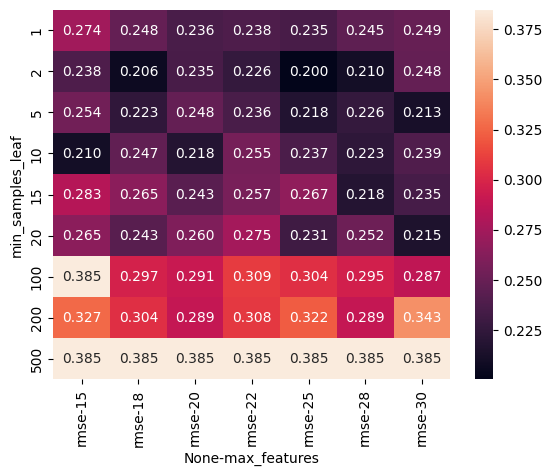

In [59]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f");

In [60]:
dt = DecisionTreeRegressor(max_features=18, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_features=18, min_samples_leaf=5)

In [61]:
y_pred = dt.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE on validation set: %.3f' % rmse)

RMSE on validation set: 0.232


##### Random Forest

In [62]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [63]:
y_pred = rf.predict(X_val)
root_mean_squared_error(y_val, y_pred)

0.15103546233717643

In [64]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=SEED)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    
    scores.append((n, rmse))

In [65]:
df_scores = pd.DataFrame(data=scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.154822
1,20,0.151834
2,30,0.149123
3,40,0.149210
4,50,0.148119
5,60,0.147370
6,70,0.147248
7,80,0.147313
8,90,0.147160
9,100,0.146563


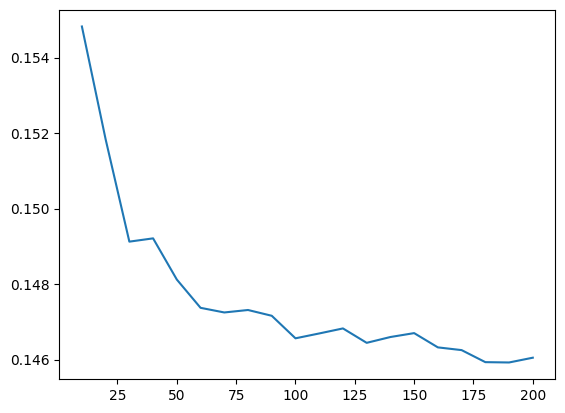

In [66]:
plt.plot(df_scores.n_estimators, df_scores.rmse);

Performance is improving util ~60 trees

In [67]:
scores = []

for d in [15, 18, 20, 22, 25, 28, 30]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, 
                                    max_features=d,
                                    random_state=SEED)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        rmse = root_mean_squared_error(y_val, y_pred)
    
        scores.append((d, n, rmse))

In [68]:
columns=["max_features", "n_estimators", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_features,n_estimators,rmse
0,15,10,0.168910
1,15,20,0.167964
2,15,30,0.164271
3,15,40,0.163642
4,15,50,0.166242


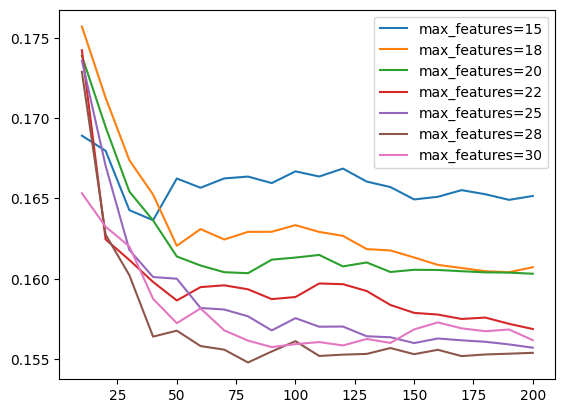

In [69]:
for d in [15, 18, 20, 22, 25, 28, 30]:
    df_subset = df_scores[df_scores.max_features==d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f"max_features={d}")
plt.legend();

We can see that max_features=28 seems to be the best

In [70]:
scores = []
max_features = 28

for s in [1, 2, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, 
                                    max_features=max_features,
                                    min_samples_leaf=s,
                                    random_state=SEED)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        rmse = root_mean_squared_error(y_val, y_pred)
    
        scores.append((s, n, rmse))

In [71]:
columns=["min_samples_leaf", "n_estimators", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,rmse
0,1,10,0.172881
1,1,20,0.162748
2,1,30,0.160219
3,1,40,0.156395
4,1,50,0.156766


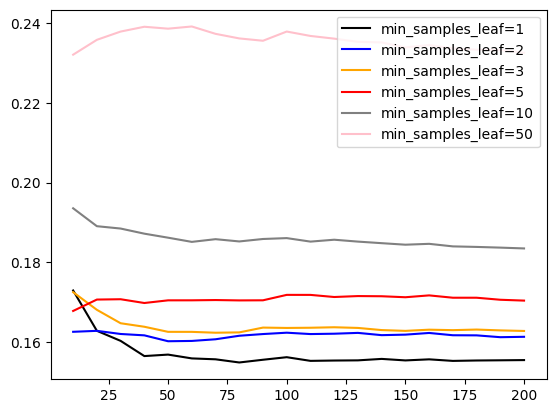

In [72]:
colors = ["black", "blue", "orange", "red", "grey", "pink"]
min_samples_leaf_values = [1, 2, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=f"min_samples_leaf={s}", color=col)
plt.legend();

In [73]:
min_samples_leaf = 1

In [74]:
rf = RandomForestRegressor(n_estimators=60,
                            max_features=max_features,
                            min_samples_leaf=min_samples_leaf,
                            random_state=SEED)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=28, n_estimators=60, random_state=42)

In [75]:
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE on validation set: %.3f' % rmse)

RMSE on validation set: 0.156


##### XGBoost

In [76]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [78]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': SEED,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [79]:
y_pred = model.predict(dval)

In [80]:
root_mean_squared_error(y_val, y_pred)

0.1525391888164692

In [81]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [82]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "nthread": 8,
    "seed": SEED,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [83]:
print(output.stdout)

[0]	train-rmse:0.28084	val-rmse:0.29813
[5]	train-rmse:0.09311	val-rmse:0.16402
[10]	train-rmse:0.05165	val-rmse:0.15036
[15]	train-rmse:0.03842	val-rmse:0.14660
[20]	train-rmse:0.03078	val-rmse:0.14397
[25]	train-rmse:0.02698	val-rmse:0.14327
[30]	train-rmse:0.02402	val-rmse:0.14229
[35]	train-rmse:0.02120	val-rmse:0.14178
[40]	train-rmse:0.01915	val-rmse:0.14164
[45]	train-rmse:0.01699	val-rmse:0.14146
[50]	train-rmse:0.01544	val-rmse:0.14161
[55]	train-rmse:0.01428	val-rmse:0.14151
[60]	train-rmse:0.01320	val-rmse:0.14155
[65]	train-rmse:0.01168	val-rmse:0.14141
[70]	train-rmse:0.01082	val-rmse:0.14145
[75]	train-rmse:0.00953	val-rmse:0.14183
[80]	train-rmse:0.00884	val-rmse:0.14199
[85]	train-rmse:0.00769	val-rmse:0.14218
[90]	train-rmse:0.00679	val-rmse:0.14222
[95]	train-rmse:0.00625	val-rmse:0.14243
[100]	train-rmse:0.00535	val-rmse:0.14235
[105]	train-rmse:0.00507	val-rmse:0.14233
[110]	train-rmse:0.00470	val-rmse:0.14234
[115]	train-rmse:0.00422	val-rmse:0.14238
[120]	train-rm

In [85]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results


In [86]:
df_score = parse_xgb_output(output)
df_score.head()

,num_iter,train_rmse,val_rmse
0,0,0.28084,0.29813
1,5,0.09311,0.16402
2,10,0.05165,0.15036
3,15,0.03842,0.14660
4,20,0.03078,0.14397


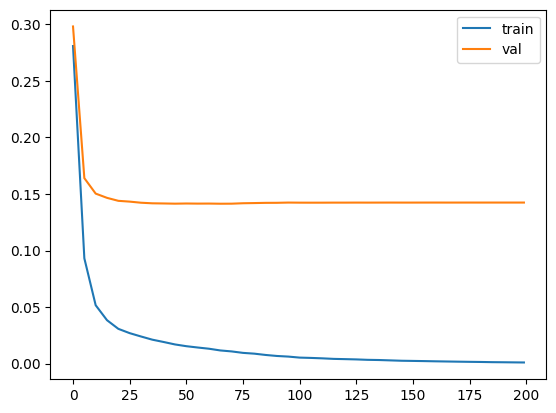

In [87]:
plt.plot(df_score.num_iter, df_score.train_rmse, label="train")
plt.plot(df_score.num_iter, df_score.val_rmse, label="val")
plt.legend();

In [88]:
# Parameter Tuning
scores = {}

In [103]:
%%capture output

xgb_params = {
    "eta": 0.05,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "nthread": 8,
    "seed": SEED,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [104]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output)

In [105]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=1', 'eta=0.5', 'eta=0.01', 'eta=0.05'])

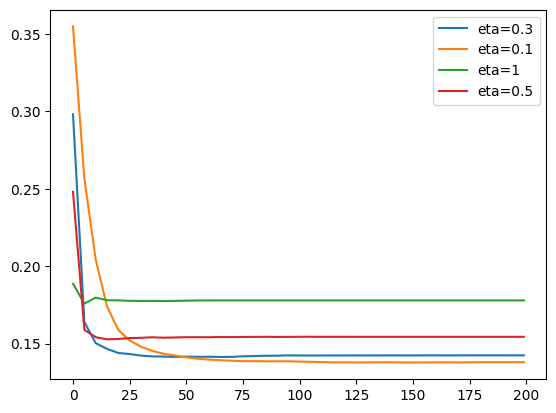

In [106]:
etas = ['eta=0.3', 'eta=0.1', 'eta=1', 'eta=0.5']
for eta in etas:
    df_score = scores[eta] 
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
plt.legend()

eta=0.3 seems to be the best

In [107]:
scores = {}

In [120]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 5,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "nthread": 8,
    "seed": SEED,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [121]:
key = f"max_depth={xgb_params['max_depth']}"
scores[key] = parse_xgb_output(output)

In [122]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=10', 'max_depth=15', 'max_depth=18', 'max_depth=20', 'max_depth=5'])

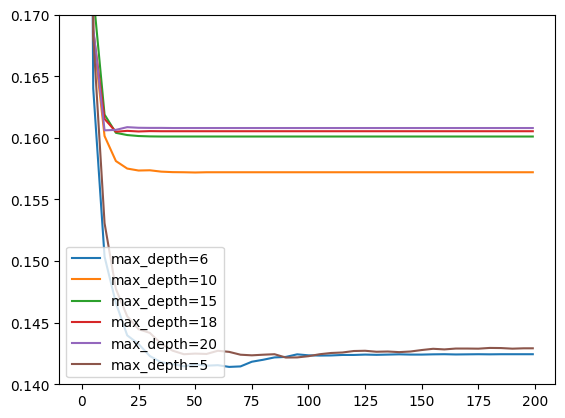

In [128]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_rmse, label=key)
plt.ylim(0.14,0.17)
plt.legend()

max_depth=6 seems to be the best

In [129]:
scores = {}

In [140]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 20,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "nthread": 8,
    "seed": SEED,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [141]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
scores[key] = parse_xgb_output(output)

In [142]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=2', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=20'])

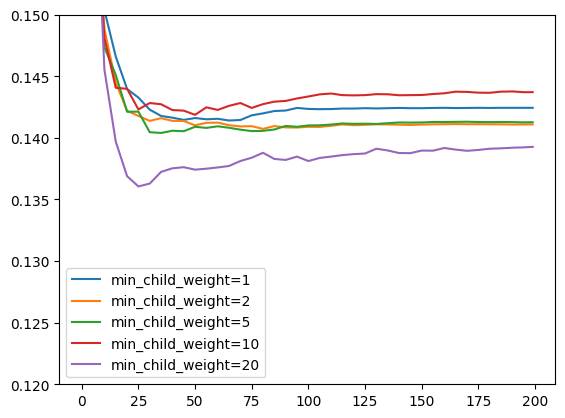

In [146]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_rmse, label=key)
plt.ylim(0.12,0.15)
plt.legend()

min_child_weight=1 seems to be the best

##### Selecting the final model

In [169]:
# Linear regression
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE on validation set: %.3f' % rmse)

RMSE on validation set: 0.198


In [176]:
# Decision Trees
dt = DecisionTreeRegressor(max_features=18, min_samples_leaf=5, random_state=SEED)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE on validation set: %.3f' % rmse)

RMSE on validation set: 0.259


In [177]:
# Random Forest
rf = RandomForestRegressor(n_estimators=60, max_features=28, min_samples_leaf=1, random_state=SEED)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE on validation set: %.3f' % rmse)

RMSE on validation set: 0.156


In [182]:
%%capture output

# XGBoost
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "nthread": 8,
    "seed": SEED,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)



In [183]:
y_pred = model.predict(dval)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'RMSE on validation set: %.3f' % rmse)

RMSE on validation set: 0.142
